In [ ]:
import numpy as np
import pandas as pd

# Part 0

Create DataFrame

In [ ]:
brend  = ['Kia', 'Hyundai']
model = ['Rio', 'Solaris']
mod_dict = {'Kia': 'Rio', 'Hyundai': 'Solaris'}
production_year = np.random.randint(2017, 2023, 400)
bin = np.random.randint(0, 2, 400)
br_col = [brend[i] for i in bin]
engine_type = [[1.4, 1.6][i] for i in bin]
engine_type = [[1.4, 1.6][i] for i in bin]
transmission = [['Auto', 'Manual'][i] for i in bin]

In [ ]:
df = pd.DataFrame()
df['brend'] = br_col
df['model'] = df.brend.map(mod_dict)
df['production_year'] = production_year
df['mileage'] = df.production_year.map(lambda i: np.random.randint((2023-i)*10000, (2023-i)*50000, 1)[0].astype(str) + ' km')
df['engine_type'] = engine_type
df['transmission'] = transmission
df['USD_price'] = df.production_year.map(lambda i: np.random.randint(16000*(1 - (2023-i)*0.15), 15000*(1 - (2023-i)*0.05), 1)[0])
df.loc[df['engine_type']==1.4, 'USD_price'] *= 0.93
df.loc[df['transmission']=='Manual', 'USD_price'] *= 0.95
df.loc[df['transmission']=='Manual', 'USD_price'] *= 0.95
df['mileage_int'] = df.mileage.map(lambda i: int(i.replace(' km', '')))
df.loc[df['mileage_int'] > 100000, 'USD_price'] *= 0.88
df.loc[df['mileage_int'] > 150000, 'USD_price'] *= 0.92
df.loc[np.random.randint(0, 401, 5).tolist(), 'production_year'] = np.nan
df.loc[np.random.randint(0, 401, 5).tolist(), 'mileage'] = np.nan
df.drop('mileage_int', axis=1, inplace=True)

In [ ]:
df

,brend,model,production_year,mileage,engine_type,transmission,USD_price
0,Kia,Rio,2021.0,69330 km,1.4,Auto,10584.3300
1,Kia,Rio,2021.0,70074 km,1.4,Auto,11589.6600
2,Kia,Rio,2020.0,131573 km,1.4,Auto,7314.8592
3,Kia,Rio,2021.0,22221 km,1.4,Auto,10816.8300
4,Kia,Rio,2018.0,102427 km,1.4,Auto,6849.1896
...,...,...,...,...,...,...,...
395,Hyundai,Solaris,2022.0,32800 km,1.6,Manual,12638.6100
396,Kia,Rio,2022.0,38758 km,1.4,Auto,13099.0500
397,Kia,Rio,2017.0,104945 km,1.4,Auto,3127.9248
398,Kia,Rio,2020.0,45177 km,1.4,Auto,9945.4200


In [ ]:
import seaborn as sns

# Part 1

Мы сгенерили датасет, посвященный продажам известных марок авто.

Давайте его изучим, посмотрим пропуски, типы данных в колонках и те колонки, которые можно сделать числовыми сделаем таковыми.

In [ ]:
df

,brend,model,production_year,mileage,engine_type,transmission,USD_price
0,Kia,Rio,2021.0,69330 km,1.4,Auto,10584.3300
1,Kia,Rio,2021.0,70074 km,1.4,Auto,11589.6600
2,Kia,Rio,2020.0,131573 km,1.4,Auto,7314.8592
3,Kia,Rio,2021.0,22221 km,1.4,Auto,10816.8300
4,Kia,Rio,2018.0,102427 km,1.4,Auto,6849.1896
...,...,...,...,...,...,...,...
395,Hyundai,Solaris,2022.0,32800 km,1.6,Manual,12638.6100
396,Kia,Rio,2022.0,38758 km,1.4,Auto,13099.0500
397,Kia,Rio,2017.0,104945 km,1.4,Auto,3127.9248
398,Kia,Rio,2020.0,45177 km,1.4,Auto,9945.4200


# Part 2

Давайте проверим, есть ли тут строки, где встречается 2 раза NaN. Если такие строки есть, дропнeм их.

# Part 3

Давайте создадим колонку со средней стоимостью авто по годам выпуска.

И колонку со средним пробегом по годам выпуска.

Покажите на графике средние пробеги и средние стоимости по годам выпуска.

# Part 4

Равномерно ли распределен признак Тип трансмиссии и тип двигателя? ТО есть, сильно ли отличаются количества авто с одним и другим типом ДВС и трансмиссии?

# Part 5

Наша задача по-умному заполнить пропуски в колонке "Пробег".. Если мы просто заполним средними то это может сломать зависимость между ценой и пробегом, а она по логике вещей существенна.

У нас есть средние пробега и и стоимости по годам. Нужно заполнить пропуски значением около среднего с учетом года выпуска но так, чтобы пробег был больше среднего, если цена ниже среднего и нгаоборот. Давайте подумаем, как это сделать...

In [ ]:
df.columns

Index(['brend', 'model', 'production_year', 'mileage', 'engine_type',
       'transmission', 'USD_price', 'mean_price', 'mean_mileage'],
      dtype='object')

# Part 6

У нас таже присутствуют пропуски в колонке Год выпуска.

Давайте также как-то по-умному их заполним!) Должно получиться)

In [ ]:
df.production_year.unique()

array([2022.,    0., 2017., 2021., 2018., 2019., 2020.])

<Axes: xlabel='production_year', ylabel='USD_price'>

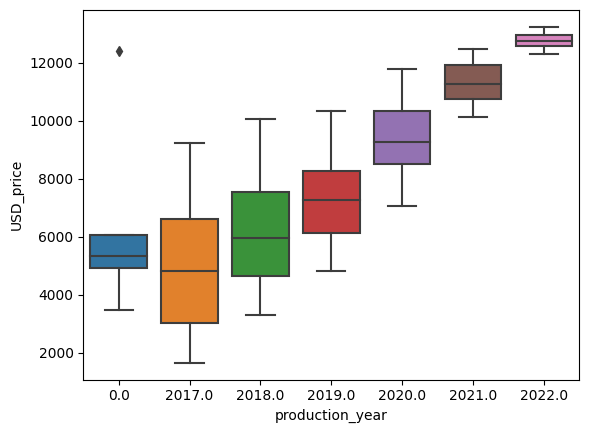

In [ ]:
sns.boxplot(x = df.production_year, y = df.USD_price)

<Axes: xlabel='production_year', ylabel='mileage'>

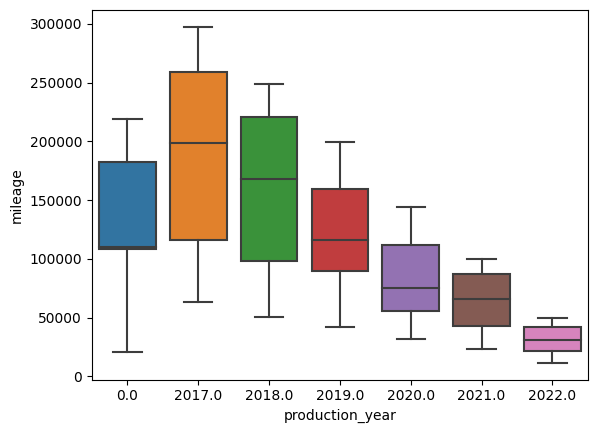

In [ ]:
sns.boxplot(x = df.production_year, y = df.mileage)

# Part 7

Давайте оценим, как в среднем много автомобиль проезжает за год независимо от типа двигателя и трансмиссии.

# Part 8

Попробуем выяснить, сколько в среднем автомобиль теряет в стоимости за год?

Это будет очень грубая оценка, но тем не менее.

Есть ли различие в потере за первый год, второй год, третий итд..


In [ ]:
import matplotlib as plt
import seaborn as sns

<Axes: xlabel='mileage', ylabel='USD_price'>

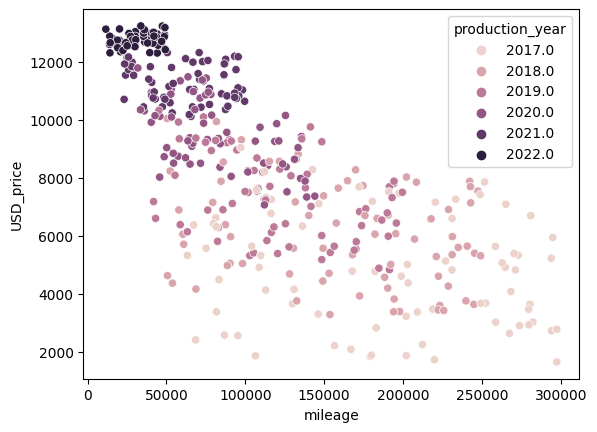

In [ ]:
sns.scatterplot(x='mileage', y = 'USD_price', data = df, hue='production_year')


<Axes: xlabel='production_year', ylabel='USD_price'>

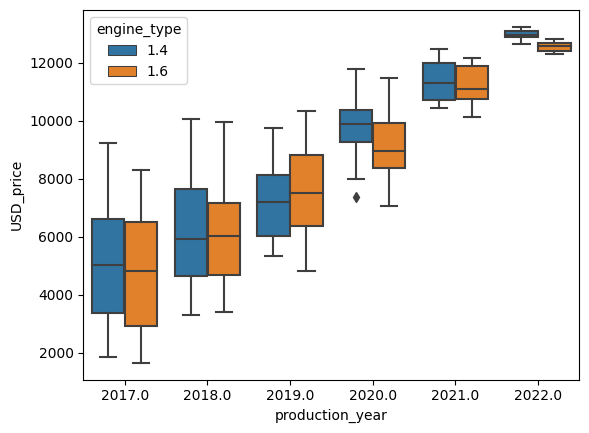

In [ ]:
sns.boxplot(y = df.USD_price, x=df.production_year, hue = df.engine_type)